In [2]:
import cv2
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
import os

100%|██████████| 17136/17136 [00:11<00:00, 1447.99it/s]


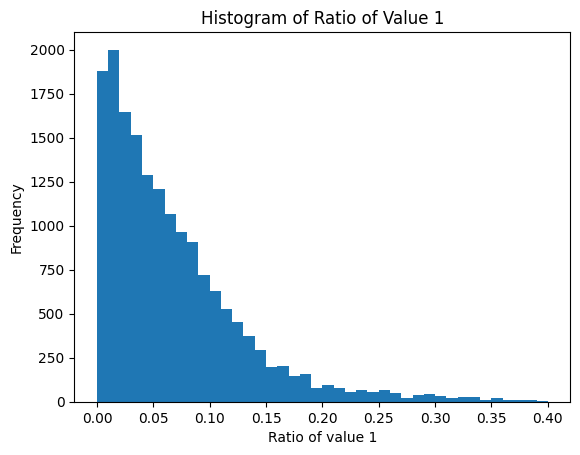

In [12]:
def calculate_ratio_histogram(image_paths):
    ratios = []
    for path in tqdm(image_paths):
        # Read the grayscale image
        image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        # Calculate the ratio of value 1 in the image
        total_pixels = image.size
        ones_pixels = (image == 1).sum()

        if ones_pixels != 0:
            ratio = ones_pixels / total_pixels
        
        ratios.append(ratio)
    
    
    # Plot the histogram
    plt.hist(ratios, bins=40, range=(0, 0.4))
    plt.xlabel('Ratio of value 1')
    plt.ylabel('Frequency')
    plt.title('Histogram of Ratio of Value 1')
    plt.show()

# Example usage
image_list_paths = glob("/home/mykang/mmsegmentation/data/Satellite/ann_dir/val_slice/*.png")
calculate_ratio_histogram(image_list_paths)

In [3]:
def visualize_images_with_masks(count, image_paths, mask_paths):
    fig, axs = plt.subplots(2, 4, figsize=(24, 14))
    fig.tight_layout()

    for i in range(8):
        image = cv2.imread(image_paths[i])
        mask = cv2.imread(mask_paths[i], cv2.IMREAD_GRAYSCALE)

        # Create a red mask for pixel label 1
        red_mask = np.zeros_like(image)
        red_mask[:, :, 0] = mask * 255  # Set the red channel to 255 where mask value is 1

        # Create a copy of the original image
        blended_image = np.copy(image)

        # Apply the red mask for pixel label 1
        blended_image[mask == 1] = cv2.addWeighted(image, 0.5, red_mask, 0.5, 0)[mask == 1]

        ax = axs[i // 4, i % 4]
        ax.imshow(blended_image.astype(np.uint8))

        ax.axis('off')

        image_title = os.path.splitext(os.path.basename(image_paths[i]))[0]
        ax.set_title(image_title, fontsize=14, pad=5)

    fig.suptitle(f"Image Count: {count}", fontsize=10)

    plt.show()

In [4]:
image_paths = glob("/home/mykang/mmsegmentation/data/Satellite/img_dir/val_slice/*.png")
mask_paths = glob("/home/mykang/mmsegmentation/data/Satellite/ann_dir/val_slice/*.png")
cnt = 296

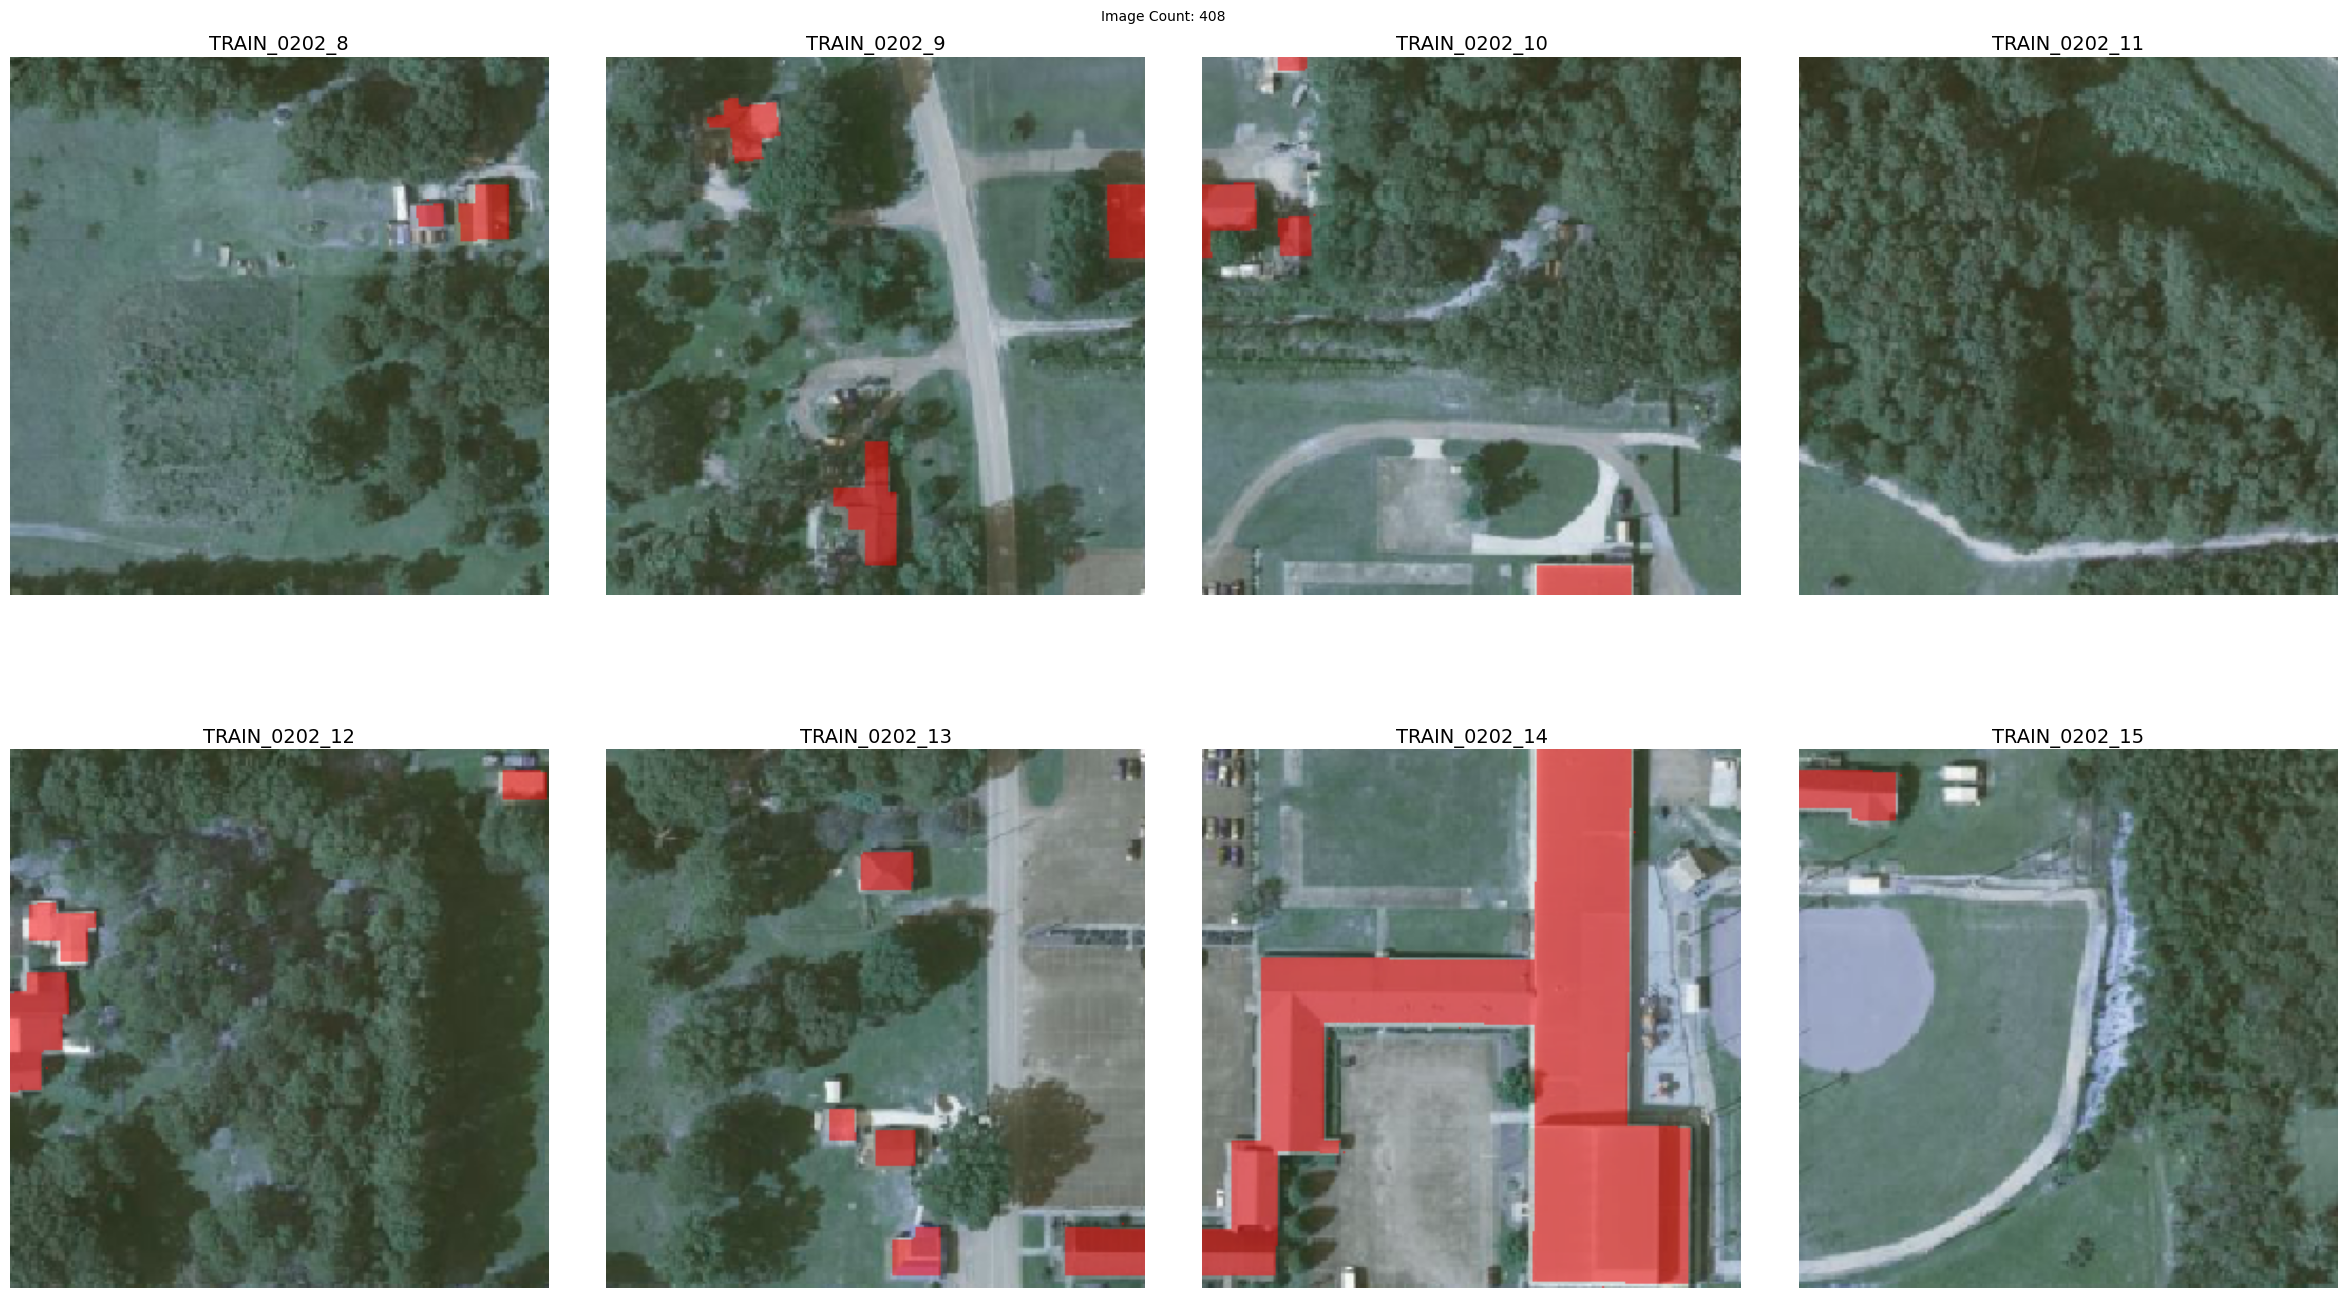

In [19]:
visualize_images_with_masks(cnt, image_paths[cnt: cnt + 8], mask_paths[cnt: cnt + 8])
cnt += 8

### 크기 비율 따져보자!

In [14]:
def calculate_connected_component_ratios(image_paths):
    ratios = []

    for path in tqdm(image_paths):
        # Read the image
        mask = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        
        # Find connected components in the mask
        num_labels, labels, stats, _ = cv2.connectedComponentsWithStats(mask, connectivity=4)
        
        # Calculate the image size
        image_size = mask.size

        # Calculate and print the ratio of each connected component compared to the image size
        for label in range(1, num_labels):
            component_size = stats[label, cv2.CC_STAT_AREA]
            ratio = component_size / image_size
            ratios.append(ratio)
    
    return ratios

In [15]:
    
# Example usage
image_paths = glob("/home/mykang/mmsegmentation/data/Satellite/ann_dir/val_slice/*.png")
ratios = calculate_connected_component_ratios(image_paths)

100%|██████████| 17136/17136 [01:11<00:00, 240.85it/s]


In [16]:
print(len(ratios))
print(len([ratio for ratio in ratios if ratio < 0.1]))

120900
120095


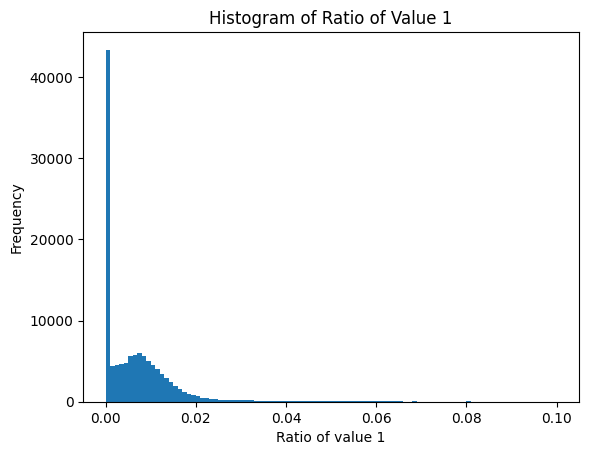

In [77]:
plt.hist(ratios, bins=100, range=(0, 0.1))
plt.xlabel('Ratio of value 1')
plt.ylabel('Frequency')
plt.title('Histogram of Ratio of Value 1')
plt.show()